In [336]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Preprocess

In [337]:
movies = pd.read_csv("P4-Section6-Homework-Dataset.csv", encoding = "ISO-8859-1")
movies.columns = ['Day', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate',
       'Studio', 'AdjustedGross', 'Budget', 'Gross',
       'IMDb', 'MovieLensRating', 'Overseas', 'OverseasPercent',
       'Profit', 'ProfitPercent', 'Runtime', 'US',
       'GrossPercentUS']

movies.Day = pd.Categorical(movies.Day)
movies.Director = pd.Categorical(movies.Director)
print(movies.info())
print(movies.columns)
movies.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day                608 non-null category
Director           608 non-null category
Genre              608 non-null object
MovieTitle         608 non-null object
ReleaseDate        608 non-null object
Studio             608 non-null object
AdjustedGross      608 non-null object
Budget             608 non-null float64
Gross              608 non-null object
IMDb               608 non-null float64
MovieLensRating    608 non-null float64
Overseas           608 non-null object
OverseasPercent    608 non-null float64
Profit             608 non-null object
ProfitPercent      608 non-null float64
Runtime            608 non-null int64
US                 608 non-null float64
GrossPercentUS     608 non-null float64
dtypes: category(2), float64(7), int64(1), object(8)
memory usage: 90.7+ KB
None
Index(['Day', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate', 'Studio',
       'AdjustedGross', 'Bud

,Day,Director,Genre,MovieTitle,ReleaseDate,Studio,AdjustedGross,Budget,Gross,IMDb,MovieLensRating,Overseas,OverseasPercent,Profit,ProfitPercent,Runtime,US,GrossPercentUS
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [338]:
#Filter data by Genre and Studio for plotting
Genre_In = np.array(['action', 'comedy', 'adventure', 'animation', 'drama'])
Studio_In = np.array(['Buena Vista Studios','Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])


In [339]:
li=[]
for gen in Genre_In:
    li.append(movies.Genre == gen)
for l in li:
    fin = fin | l
movies = movies[fin]

In [340]:
movies.head()

,Day,Director,Genre,MovieTitle,ReleaseDate,Studio,AdjustedGross,Budget,Gross,IMDb,MovieLensRating,Overseas,OverseasPercent,Profit,ProfitPercent,Runtime,US,GrossPercentUS
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [447]:
# fil = []
# for stud in Studio_In:
#     fil.append(movies.Studio == stud)

# fina = fil[0]
# for filt in fil:
#     fina = filt | fina
# movies = movies[fina]
# movies.head()

movies = movies[movies.Studio.isin(Studio_In)]
movies.head()

,Day,Director,Genre,MovieTitle,ReleaseDate,Studio,AdjustedGross,Budget,Gross,IMDb,MovieLensRating,Overseas,OverseasPercent,Profit,ProfitPercent,Runtime,US,GrossPercentUS
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5


#### Plotting 

In [443]:
len(movies)

423

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text yticklabel objects>)

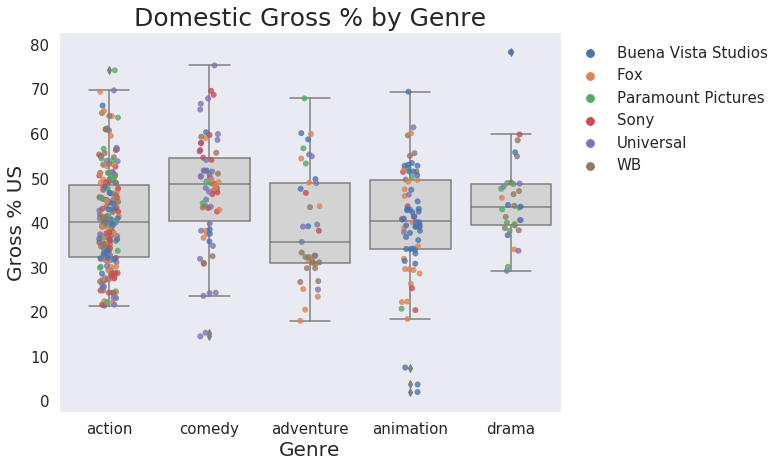

In [448]:
f, axes = plt.subplots(1,1, figsize=(9,7) )
sns.set(style="dark")

p1 = sns.boxplot(data=movies, x= "Genre", y="GrossPercentUS",color="lightgray", ax = axes )
p2 = sns.stripplot(data=movies, x="Genre", y="GrossPercentUS", jitter=True,ax=axes, size=6,\
                   alpha=0.8, hue='Studio')

p1.set_title("Domestic Gross % by Genre", {"size":"25"})
p1.legend(loc="upper left",bbox_to_anchor=(1,1),fontsize=15, frameon=False)
plt.ylabel("Gross % US",fontsize=20)
plt.xlabel("Genre", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
